In [1]:
!pip install gensim

In [2]:
!python -m spacy download en_core_web_md

2023-07-04 12:49:17.835486: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-04 12:49:19.416925: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 11.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [3]:
import gensim
import os
import pandas as pd
import numpy as np
import spacy as sp
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
import sklearn as sk
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from gensim.models import Word2Vec

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
nlp = sp.load('en_core_web_md')

In [6]:
path = "/content/drive/MyDrive/Datasets - UFAM - Sprint 4 - RCS (3) - Cópia de Datasets - UFAM - Sprint 4 - RCS (3).csv"
df = pd.read_csv(path)

In [7]:
df.head()

,test_id,original_idx,original_step,step,labels
0,CCTEST-65303,1,"From the DUT, open Messaging app",from the dut,0.0
1,CCTEST-65303,1,"From the DUT, open Messaging app",open messaging app,0.0
2,CCTEST-65303,2,Start chat,start chat,1.0
3,CCTEST-65303,3,Select 2 or more contacts,select 2 or more contacts,1.0
4,CCTEST-65303,4,Confirm OCG creation,confirm ocg creation,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   test_id        471 non-null    object 
 1   original_idx   471 non-null    int64  
 2   original_step  471 non-null    object 
 3   step           471 non-null    object 
 4   labels         101 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 18.5+ KB


##Codigo para criar um csv com as frases unicas do RCS

In [ ]:
# Carrega o arquivo CSV
path = "/content/drive/MyDrive/Datasets - UFAM - Sprint 4 - RCS (3) - Cópia de Datasets - UFAM - Sprint 4 - RCS (3).csv"
df = pd.read_csv(path)
# Remove as duplicatas mantendo apenas as frases únicas
frases_unicas = df['step'].unique()

# Cria um novo DataFrame com as frases únicas
novo_dataframe = pd.DataFrame({'frase': frases_unicas})

# Salva o novo DataFrame em um novo arquivo CSV
novo_dataframe.to_csv('frase_unicas.csv', index=False)

##Codigo para a partir das frases unicas rotuladas, rotular o resto

In [9]:
# Carrega o arquivo CSV com as frases únicas e seus rótulos
path = "/content/drive/MyDrive/frase_unicas - frase_unicas.csv"
frases_unicas = pd.read_csv(path)

# Carrega o arquivo CSV original com frases repetidas
path2 = "/content/drive/MyDrive/Cópia de Datasets - UFAM - Sprint 4 - RCS (3) - Cópia de Datasets - UFAM - Sprint 4 - RCS (3).csv"
frases_repetidas = pd.read_csv(path2)

# Combina os DataFrames com base na coluna "frase"
frases_rotuladas = pd.merge(frases_repetidas, frases_unicas, on='step', how='left')

# Salva o DataFrame com as frases rotuladas em um novo arquivo CSV
frases_rotuladas.to_csv('frases_rotuladas.csv', index=False)

In [10]:
frases_rotuladas

,step,labels_x,labels_y
0,from the dut,NaN,0
1,open messaging app,NaN,1
2,start chat,NaN,1
3,select 2 or more contacts,NaN,0
4,confirm ocg creation,NaN,0
...,...,...,...
466,open messaging app,NaN,1
467,start chat,NaN,1
468,select one or more rcs capable contact,NaN,1
469,select one or more non - rcs capable contact,NaN,1


##Classificacao, normalizacao, tokenizacao e remocao de stopwords

In [16]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Lista para armazenar os tokens de cada string
tokens = []
x_strings = frases_rotuladas['step']
# Lista para armazenar as strings processadas
processed_strings = []

# Itera sobre as strings e realiza o processamento (tokenização)
for string in x_strings:
    doc = nlp(string)
    # Extrai os tokens da string
    string_tokens = [token.lemma_.lower() for token in doc]
    # Junta os tokens em uma única string
    processed_string = ' '.join(string_tokens)
    # Adiciona a string processada à lista
    processed_strings.append(processed_string)

# Cria o objeto TfidfVectorizer
vectorizer = TfidfVectorizer()

# Vetoriza as strings processadas
vectorized_data = vectorizer.fit_transform(processed_strings)

# Imprime os vetores das strings
for i, vector in enumerate(vectorized_data):
    print(f"Vetor da string {i+1}: {vector.toarray()}")

A saída de streaming foi truncada nas últimas 5000 linhas.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.6404047
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.3485534  0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.51795439
  0.         0.         0.         0.         0.         0.
  0.         0.         0.

In [17]:
#lista com os valores de 5 rodagens:
#zerar quando quiser desenhar o grafico

lista_accuracy =[]
lista_precision =[]
lista_recall =[]
lista_f1_score =[]

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics

# Vetor de rótulos (genérico ou não) correspondentes às strings
ylabels = frases_rotuladas['labels_y']

# Convertendo os dados vetorizados em um formato apropriado para o modelo RNN
X_data = vectorized_data.toarray()
y_data = ylabels.values
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, shuffle=True)

# Treinamento do modelo SVM
modelo_svm = SVC()
modelo_svm.fit(X_train, y_train)

# Classificação das frases de teste
y_pred = modelo_svm.predict(X_test)

# Avaliação do modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

#adiciona os resultadaos nas listas respectivas
lista_accuracy.append(accuracy)
lista_precision.append(precision)
lista_recall.append(recall)
lista_f1_score.append(f1_score)

#printa os valores dos resultados
print("accuracy: ", accuracy)
print("precision: ",precision)
print("recall: ",recall)
print("f1_score: ",f1_score)

accuracy:  0.8732394366197183
precision:  0.9722222222222222
recall:  0.6730769230769231
f1_score:  0.7954545454545455


In [ ]:
lista_accuracy

[0.823943661971831,
 0.7887323943661971,
 0.7746478873239436,
 0.8028169014084507,
 0.8450704225352113]

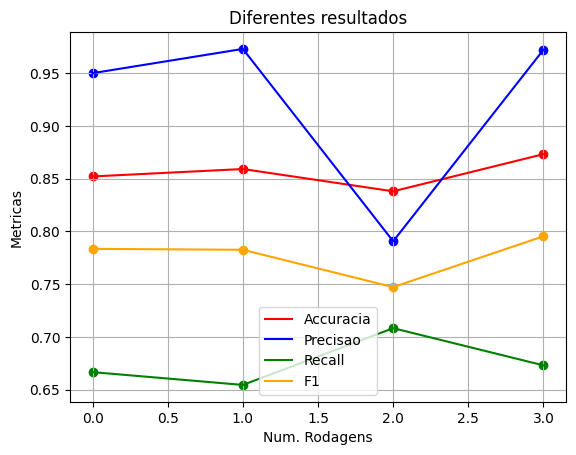

In [22]:
import matplotlib.pyplot as plt

def plot_lines(y1, y2, y3, y4):
    plt.scatter(range(len(y1)), y1, color='red')
    plt.scatter(range(len(y2)), y2, color='blue')
    plt.scatter(range(len(y3)), y3, color='green')
    plt.scatter(range(len(y4)), y4, color='orange')
    plt.plot(y1, color='red', label='Accuracia')
    plt.plot(y2, color='blue', label='Precisao')
    plt.plot(y3, color='green', label='Recall')
    plt.plot(y4, color='orange', label='F1')

    plt.xlabel('Num. Rodagens')
    plt.ylabel('Metricas')
    plt.title('Diferentes resultados')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_lines(lista_accuracy, lista_precision, lista_recall, lista_f1_score)


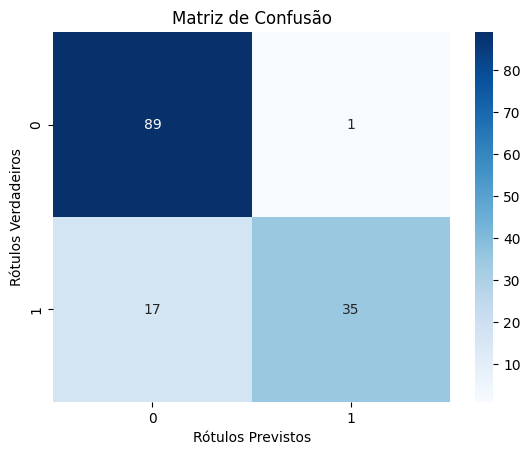

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()

In [24]:
pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.9 MB/s eta 0:00:00


In [25]:
pip install torch transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.1 MB/s eta 0:00:00


In [26]:
import torch
from transformers import XLNetTokenizer, XLNetForSequenceClassification
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import TensorDataset, DataLoader

ylabels = frases_rotuladas['labels_y']

# Convertendo os dados vetorizados em um formato apropriado para o modelo RNN
X_data = processed_strings
y_data = ylabels.values
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, shuffle=True)


# Inicializar o tokenizador e o modelo
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Codificar as frases em tokens
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

# Criar tensores dos rótulos
train_labels = torch.tensor(y_train)
test_labels = torch.tensor(y_test)

# Criar conjuntos de dados com os encodings e rótulos
train_dataset = TensorDataset(torch.tensor(train_encodings['input_ids']),
                              torch.tensor(train_encodings['attention_mask']),
                              train_labels)
test_dataset = TensorDataset(torch.tensor(test_encodings['input_ids']),
                             torch.tensor(test_encodings['attention_mask']),
                             test_labels)

# Definir hiperparâmetros
batch_size = 16
learning_rate = 1e-5
num_epochs = 5

# Criar DataLoader para carregar os dados em lotes durante o treinamento
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Definir otimizador
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# Loop de treinamento
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
model.train()

for epoch in range(num_epochs):
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Avaliar o modelo no conjunto de teste
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
model.eval()
predictions = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=1)
        predicted_labels = torch.argmax(probabilities, dim=1)
        predictions.extend(predicted_labels.cpu().numpy().tolist())

# Imprimir as previsões
print(predictions)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1]


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Converter as previsões em um array numpy
predictions = np.array(predictions)

# Calcular as métricas
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Imprimir as métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1:", f1)


Acurácia: 0.8661971830985915
Precisão: 0.88
Recall: 0.7719298245614035
F1: 0.822429906542056


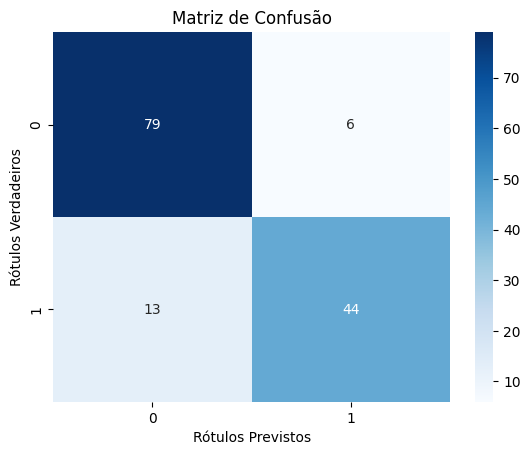

In [28]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, predictions)

# Plotar a matriz de confusão
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()

###Usando dados do MS2

In [29]:
# Carrega o arquivo CSV original com frases repetidas
path3 = "/content/drive/MyDrive/MS2_rotuladas - MS2_rotuladas.csv"
frases_ms2 = pd.read_csv(path3)

In [30]:
# Lista para armazenar os tokens de cada string
tokens2 = []
x_strings2 = frases_ms2['Step']
# Lista para armazenar as strings processadas
processed_strings2 = []

# Itera sobre as strings e realiza o processamento (tokenização, remoção de stopwords e normalização)
for string2 in x_strings2:
    doc = nlp(string2)
    # Extrai os tokens da string, removendo as stopwords normalização
    string_tokens2 = [token.lemma_.lower() for token in doc]
    # Junta os tokens em uma única string
    processed_string2 = ' '.join(string_tokens2)
    # Adiciona a string processada à lista
    processed_strings2.append(processed_string2)

# Cria o objeto TfidfVectorizer
vectorizer2 = TfidfVectorizer()

# Vetoriza as strings processadas
vectorized_data2 = vectorizer.fit_transform(processed_strings2)

# Imprime os vetores das strings
for i, vector in enumerate(vectorized_data2):
    print(f"Vetor da string {i+1}: {vector.toarray()}")

Vetor da string 1: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.66024276 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.      

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np

# Vetor de rótulos (genérico ou não) correspondentes às strings
ylabels2 = frases_ms2['Manual Classification']

# Convertendo os dados vetorizados em um formato apropriado para o modelo RNN
X_train = vectorized_data.toarray()
y_train = ylabels.values
X_test = vectorized_data2.toarray()
y_test = ylabels2.values

# Determinar o número máximo de características nos dados de treinamento
max_features = vectorized_data2.shape[1]

# Aplicar padding nos dados de teste
num_samples, num_features = X_train.shape
if num_features < max_features:
    padding_size = max_features - num_features
    padding = np.zeros((num_samples, padding_size))
    X_train_padded = np.concatenate((X_train, padding), axis=1)
else:
    X_train_padded = X_test

# Treinamento do modelo SVM
modelo_svm = SVC()
modelo_svm.fit(X_train_padded, y_train)

# Classificação das frases de teste
y_pred = modelo_svm.predict(X_test)

# Avaliação do modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

#printa os valores dos resultados
print("accuracy: ", accuracy)
print("precision: ",precision)
print("recall: ",recall)
print("f1_score: ",f1_score)

accuracy:  0.57
precision:  0.47058823529411764
recall:  0.19047619047619047
f1_score:  0.27118644067796605


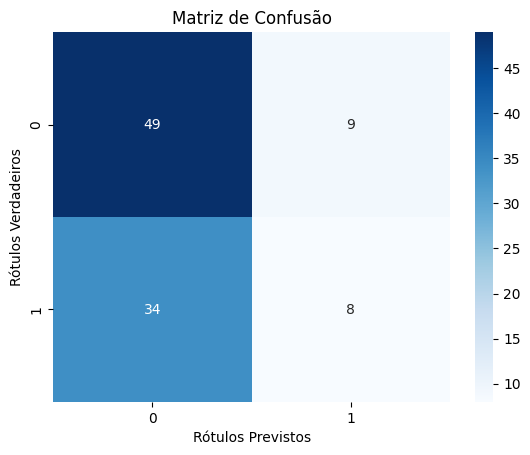

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()

###aplicando no bert

In [ ]:
import torch
from transformers import XLNetTokenizer, XLNetForSequenceClassification
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import TensorDataset, DataLoader

# Vetor de rótulos (genérico ou não) correspondentes às strings
ylabels2 = frases_ms2['Manual Classification']

# Convertendo os dados vetorizados em um formato apropriado para o modelo RNN
X_train = processed_strings
y_train = ylabels.values
X_test = processed_strings2
y_test = ylabels2.values


# Inicializar o tokenizador e o modelo
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Codificar as frases em tokens
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

# Criar tensores dos rótulos
train_labels = torch.tensor(y_train)
test_labels = torch.tensor(y_test)

# Criar conjuntos de dados com os encodings e rótulos
train_dataset = TensorDataset(torch.tensor(train_encodings['input_ids']),
                              torch.tensor(train_encodings['attention_mask']),
                              train_labels)
test_dataset = TensorDataset(torch.tensor(test_encodings['input_ids']),
                             torch.tensor(test_encodings['attention_mask']),
                             test_labels)

# Definir hiperparâmetros
batch_size = 16
learning_rate = 1e-5
num_epochs = 5

# Criar DataLoader para carregar os dados em lotes durante o treinamento
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Definir otimizador
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# Loop de treinamento
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
model.train()

for epoch in range(num_epochs):
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Avaliar o modelo no conjunto de teste
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
model.eval()
predictions = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=1)
        predicted_labels = torch.argmax(probabilities, dim=1)
        predictions.extend(predicted_labels.cpu().numpy().tolist())

# Imprimir as previsões
print(predictions)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

[1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Converter as previsões em um array numpy
predictions = np.array(predictions)

# Calcular as métricas
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Imprimir as métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1:", f1)


Acurácia: 0.37
Precisão: 0.3220338983050847
Recall: 0.4523809523809524
F1: 0.37623762376237624


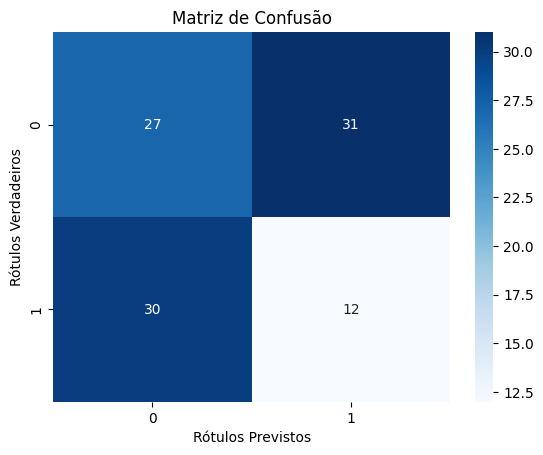

In [ ]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, predictions)

# Plotar a matriz de confusão
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()